As it is always said in every notebook, first import your libraries!:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/medical_text/alldata_1_for_kaggle.csv',encoding="latin1") # the encoding of this file doesn't follow uft8

In [ ]:
df

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...
...,...,...,...
7565,7565,Colon_Cancer,we report the case of a 24yearold man who pres...
7566,7566,Colon_Cancer,among synchronous colorectal cancers scrcs rep...
7567,7567,Colon_Cancer,the heterogeneity of cancer cells is generally...
7568,7568,Colon_Cancer,"""adipogenesis is the process through which mes..."


There is an additional column named 'unnamed: 0' which should be deleted, but do not bother yourself! We just ignore it

In [ ]:
print (df['0'].unique()) # different categories of label column
print (50*'-')
print (df['0'].value_counts()) # the abundance of each label

['Thyroid_Cancer' 'Colon_Cancer' 'Lung_Cancer']
--------------------------------------------------
Thyroid_Cancer    2810
Colon_Cancer      2580
Lung_Cancer       2180
Name: 0, dtype: int64


In [ ]:
df['a'][0] # the full text of first sample

"Thyroid surgery in  children in a single institution from Osama Ibrahim Almosallama Ali Aseerib Ahmed Alhumaida Ali S AlZahranic Saif Alsobhib Saud AlShanafeybFrom the  aDepartment of Surgery College of Medicine Qassim University Buraidah Al Qassim Saudi Arabia  bDepartment of Surgery King Faisal Specialist Hospital and Research Center Riyadh Saudi Arabia cDepartment of Medicine King Faisal Specialist Hospital and Research Center Riyadh Saudi Arabia Correspondence   Dr  Osama Ibrahim  Almosallam  Department of  Surgery  College  of  Medicine Qassim  University  PO  Box   Buraidah  Al  Qassim   Saudi  Arabia  osama_iaahotmailcom ORCID orcid0000000290367564        Citation  Almosallam OI Aseeri A Alhumaid A AlZahrani AS Alsobhi S AlShanafey S Thyroid surgery in  children  in  a  single  institution  from   Ann  Saudi  Med         Received January  Accepted May  Published August  Copyright Copyright   Annals of Saudi Medicine Saudi Arabia This is an   access  under the Creative Commons A

These text data are not cleaned. I mean there are a lot of unuseful words as well as words with the same root. So, what I'm doing in the following is importing necessary libraries and defining a function to clean every text:

In [ ]:
import spacy
model = spacy.load('en_core_web_sm') # for lemmatization

import nltk
nltk.download('stopwords') # for deleting stopwords
from nltk.tokenize import TweetTokenizer # for tokenizing the text (TweetTokenizer is more appropriate than word_tokenize)

import string # for deleting punctuations

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def cleanData(text, lowercase = False, remove_stops = False, remove_punc = False, stemming = False, lemmatization = False):
    
    if remove_punc:
      text = text.translate(str.maketrans('', '', string.punctuation))
    

    if lowercase:
      tk = TweetTokenizer()
      text = tk.tokenize(text)
      text = " ".join([w.lower() for w in text])  
    if remove_stops:
      from nltk.corpus import stopwords
      en = stopwords.words('english')
      tk = TweetTokenizer()
      text = tk.tokenize(text)
      text = " ".join([w for w in text if w not in en])
    if stemming:
      from nltk.stem import PorterStemmer
      st = PorterStemmer()
      tk = TweetTokenizer()
      text = tk.tokenize(text)
      text = " ".join([st.stem(w) for w in text])
    if lemmatization: # if you don't lemmatize the text, you will get words like 'active','activated' and 'activity' as separate words
      doc = model(text)
      text = " ".join([token.lemma_ for token in doc])
    return text

'''
Note that the above function is general and I won't use all modules here
'''

In [ ]:
# To give more tuition, I apply the function on the first text file: 
c = cleanData(df['a'][0], remove_stops = True, remove_punc = True,lemmatization = True)

In [ ]:
c

'thyroid surgery child single institution Osama Ibrahim Almosallama Ali Aseerib Ahmed Alhumaida Ali S AlZahranic Saif Alsobhib Saud alshanafeybfrom aDepartment Surgery College Medicine Qassim University Buraidah Al Qassim Saudi Arabia bDepartment Surgery King Faisal Specialist Hospital Research Center Riyadh Saudi Arabia cDepartment Medicine King Faisal Specialist Hospital Research Center Riyadh Saudi Arabia Correspondence Dr Osama Ibrahim Almosallam Department Surgery College Medicine Qassim University PO Box Buraidah Al Qassim Saudi Arabia osamaiaahotmailcom ORCID orcid 00000002903 67564 Citation Almosallam OI Aseeri A Alhumaid a AlZahrani as Alsobhi S AlShanafey S Thyroid surgery child single institution Ann Saudi Med receive January Accepted May publish August Copyright Copyright annal saudi Medicine Saudi Arabia this access Creative Commons AttributionNonCommercialNoDerivatives International License cc BYNCND the detail access httpcreativecommon licensesbyncnd 40funde NoneBACKGROU

In [ ]:
# here, I perform the function on each text file in order:

dd = pd.Series(index = df.index , dtype = 'object') # to save cleaned file

for i in range (0,7570):
  dd[i] = cleanData(df['a'][i], remove_stops = True, remove_punc = True, lemmatization = True)

In [ ]:
df.insert(3, 'cleaned_data', dd)
df

,Unnamed: 0,0,a,cleaned_data
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,thyroid surgery child single institution Osama...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",the adopt strategy use prior year base four ex...
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis ï ¬ ...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,solitary plasmacytoma SP skull uncommon clinic...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,this study aim investigate serum matrix metall...
...,...,...,...,...
7565,7565,Colon_Cancer,we report the case of a 24yearold man who pres...,report case 24yearold man present chief compla...
7566,7566,Colon_Cancer,among synchronous colorectal cancers scrcs rep...,among synchronous colorectal cancer scrc repor...
7567,7567,Colon_Cancer,the heterogeneity of cancer cells is generally...,heterogeneity cancer cell generally accept ast...
7568,7568,Colon_Cancer,"""adipogenesis is the process through which mes...",adipogenesis process mesenchymalstem cell mscs...


Well, as you can see in the above table, the text is cleaned. For example, in the first row, the children have changed to the child, or words such as 'the' and 'this' are deleted. 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/df.csv')

Mainly, there are two ways of text feature extraction. Firstly, I will employ the CountVectorize method (which just counts the term frequency of words):

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df = 0.2, max_df = 0.8, stop_words = 'english') # the list of stop words differs from our function. It is worth limiting our data again to get rid of non-meaningful words
X = cv.fit_transform(df['cleaned_data'])

In [ ]:
'''
you can get the name of all features by the following command (but I won't execute it here):
cv.get_feature_names_out()
'''

In [ ]:
# we can check the frequency of features in a descending order:
cv.vocabulary_

{'thyroid': 641,
 'surgery': 626,
 'single': 596,
 'medicine': 408,
 'university': 657,
 'al': 58,
 'hospital': 302,
 'research': 555,
 'center': 111,
 'correspondence': 164,
 'department': 190,
 'med': 404,
 'receive': 527,
 'accepted': 30,
 'publish': 517,
 'august': 86,
 'copyright': 160,
 'access': 31,
 'creative': 166,
 'commons': 138,
 'international': 338,
 'license': 364,
 'data': 177,
 'analyze': 64,
 'outcome': 456,
 'medical': 407,
 'record': 532,
 'health': 295,
 'care': 106,
 'method': 415,
 'collect': 129,
 'clinical': 125,
 'year': 691,
 'period': 477,
 'pathology': 469,
 'treatment': 649,
 'size': 598,
 'undergo': 653,
 'procedure': 498,
 'female': 259,
 'mean': 401,
 'age': 55,
 'associate': 83,
 'multiple': 427,
 'type': 652,
 'history': 300,
 'exposure': 252,
 'correlate': 161,
 'final': 262,
 'case': 108,
 'malignant': 393,
 'lymph': 384,
 'node': 437,
 'metastasis': 413,
 'lung': 383,
 'total': 645,
 'develop': 198,
 'follow': 267,
 'month': 423,
 'median': 405,
 '

In [ ]:
pd.DataFrame(X.toarray(), columns = cv.get_feature_names_out())

,0c,10,11,12,13,14,15,16,17,18,...,western,widely,woman,work,world,worldwide,write,yang,year,zhang
0,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,3,0,0,1,12,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,8,0,0,0,0,5,0
2,1,1,0,0,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,2,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,5,0,0,0
4,1,2,1,0,1,4,2,0,1,0,...,0,0,3,3,1,1,1,1,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7565,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
7566,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
7567,1,1,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,1,0,1
7568,0,0,0,0,0,0,4,3,0,0,...,0,0,0,1,0,0,0,0,1,2


Well, you can see the features there, but are they important? The truth is, I (as a data analyzer) can not tell you whether there are important or not! Because in medical cases, we must consult with a doctor to improve our features (In some situations such as the estimation of the house price, all people are kind of familiar with the importance of different features. But this is not the case in our task here). All we can do is perform several language processes to make the text ready for the ML algorithms:

I will continue my work to get results:

In [ ]:
# creating the labels
Y = df['0']

# our label is categorical, so we must transform it:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y = le.fit_transform(Y)
Y

array([2, 2, 2, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=40) # Notice that shuffle is true by default.

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, Y_train)
train_predict = clf.predict(X_train)
test_predict = clf.predict(X_test)
print (metrics.accuracy_score(Y_train,train_predict))
print (metrics.accuracy_score(Y_test,test_predict))

0.7858086431402151
0.7732276530162924


It is emphasized in the Sklearn site that: 'the inventors of CNB show empirically that the parameter estimates for CNB are more stable than those for MNB. Further, CNB regularly outperforms MNB (often by a considerable margin) on text classification tasks'. So, it is worth implementing this algorithm too:

In [ ]:
from sklearn.naive_bayes import ComplementNB
clf = ComplementNB()
clf.fit(X_train, Y_train)
train_predict = clf.predict(X_train)
test_predict = clf.predict(X_test)
print (metrics.accuracy_score(Y_train,train_predict))
print (metrics.accuracy_score(Y_test,test_predict))

0.7541045480279298
0.7569352708058125


In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train.toarray(), Y_train)
train_predict = clf.predict(X_train.toarray())
test_predict = clf.predict(X_test.toarray())
print (metrics.accuracy_score(Y_train,train_predict))
print (metrics.accuracy_score(Y_test,test_predict))

0.9367805246272881
0.9229414354909732


As it is clear!, Gaussian outperformed the previous two sub classes of naive bayes classifier. 

There is another renowned text classifier algorithm named support vector machines. This method uses several hyperparameters, so it is better to tune them using the GridSearch function:

In [ ]:
from sklearn.model_selection import GridSearchCV as GSC
from sklearn import svm

params = [{'C':[0.9,1,1.1],'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'degree':[2,3]}]
search = GSC(estimator = svm.SVC(random_state = 123) , param_grid = params, scoring = 'accuracy', cv = 10 , n_jobs = -1)
search.fit(X_train,Y_train)
print (search.best_score_)
print (search.best_params_) 

0.9996226415094339
{'C': 0.9, 'degree': 2, 'kernel': 'linear'}


Seemingly svc works very well on the data!!! Let's explore it more:

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(C = 0.9 , kernel = 'linear', random_state = 123) # degree is important only for 'poly' kernel
clf.fit(X_train.toarray(), Y_train) # SVC does not accept sparse matrix
train_predict = clf.predict(X_train.toarray())
test_predict = clf.predict(X_test.toarray())
print (metrics.accuracy_score(Y_train,train_predict))
print (metrics.accuracy_score(Y_test,test_predict))

1.0
1.0


Ok, we have achieved full accuracy for both train and test data. At this stage, we can say that our job is done for this task! 

In [ ]:
# to make sure of our results :)
print (test_predict)
print (Y_test)

[0 0 2 ... 1 2 0]
[0 0 2 ... 1 2 0]


Text(0.5, 1.0, 'accuracy score results for tf features')

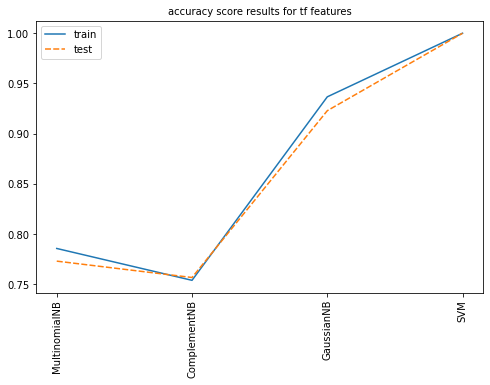

In [ ]:
# To put all things together, let's plot all results together and compare them visually:
meth = ['MultinomialNB', 'ComplementNB' , 'GaussianNB', 'SVM'] 

train = [0.7858 , 0.7541, 0.9367, 1]
test = [0.7732 , 0.7569, 0.9229, 1]

df_ = pd.DataFrame(index = meth , columns = ['train','test'])
df_['train'] = train
df_['test'] = test


fig = plt.figure(figsize = (8,5))
g = sns.lineplot(data = df_)
g.tick_params(axis='x', rotation=90)
g.set_title(label = 'accuracy score results for tf features',fontsize = 10)

For the sake of completeness, I get features of cleaned_data using tf-idf method and perform all previously executed ML algorithms for them too:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer(min_df = 0.2, max_df = 0.8, stop_words = 'english')
X = vector.fit_transform(df['cleaned_data'])

In [ ]:
pd.DataFrame(X.toarray(), columns = cv.get_feature_names_out())

,0c,10,11,12,13,14,15,16,17,18,...,western,widely,woman,work,world,worldwide,write,yang,year,zhang
0,0.010413,0.000000,0.010137,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.010971,0.000000,0.000000,0.031271,0.00000,0.000000,0.011797,0.083687,0.000000
1,0.017030,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.098673,0.000000,0.00000,0.000000,0.000000,0.057031,0.000000
2,0.031864,0.020833,0.000000,0.0,0.000000,0.032951,0.030554,0.000000,0.033126,0.032944,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.042682,0.000000
3,0.034285,0.022415,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.049661,0.000000,0.00000,0.155715,0.000000,0.000000,0.000000
4,0.014446,0.018890,0.014063,0.0,0.014112,0.059755,0.027705,0.000000,0.015018,0.000000,...,0.000000,0.000000,0.044562,0.031388,0.014461,0.01517,0.013122,0.016367,0.067728,0.070102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7565,0.032567,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.023587,0.000000,0.00000,0.029583,0.000000,0.000000,0.000000
7566,0.028380,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.020554,0.028410,0.00000,0.000000,0.032154,0.000000,0.000000
7567,0.013915,0.009098,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.014629,0.014662,0.000000,0.010078,0.000000,0.00000,0.000000,0.015766,0.000000,0.013505
7568,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.052291,0.041247,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.009874,0.000000,0.00000,0.000000,0.000000,0.009131,0.026463


Y labels are the same.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, Y_train)
train_predict = clf.predict(X_train)
test_predict = clf.predict(X_test)
print (metrics.accuracy_score(Y_train,train_predict))
print (metrics.accuracy_score(Y_test,test_predict))

0.7842989243253444
0.7745486569793043


In [ ]:
from sklearn.naive_bayes import ComplementNB
clf = ComplementNB()
clf.fit(X_train, Y_train)
train_predict = clf.predict(X_train)
test_predict = clf.predict(X_test)
print (metrics.accuracy_score(Y_train,train_predict))
print (metrics.accuracy_score(Y_test,test_predict))

0.7742970371768259
0.7736679876706297


In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train.toarray(), Y_train)
train_predict = clf.predict(X_train.toarray())
test_predict = clf.predict(X_test.toarray())
print (metrics.accuracy_score(Y_train,train_predict))
print (metrics.accuracy_score(Y_test,test_predict))

0.9222494810341574
0.9084103918978423


In [ ]:
clf = svm.SVC(C = 0.9 , kernel = 'linear', random_state = 123) 
clf.fit(X_train.toarray(), Y_train) # SVC does not accept sparse matrix
train_predict = clf.predict(X_train.toarray())
test_predict = clf.predict(X_test.toarray())
print (metrics.accuracy_score(Y_train,train_predict))
print (metrics.accuracy_score(Y_test,test_predict))

0.9569730137761842
0.9484808454425363


Text(0.5, 1.0, 'accuracy score results for tf-idf features')

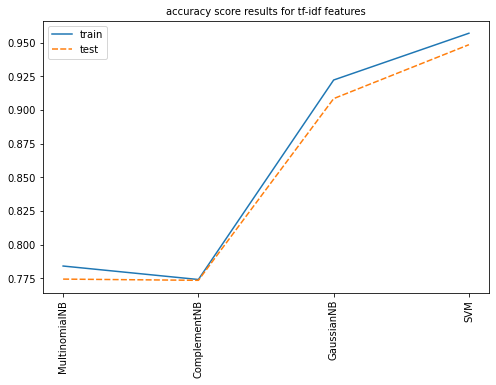

In [ ]:
meth = ['MultinomialNB', 'ComplementNB' , 'GaussianNB', 'SVM'] # a_raw

train = [0.7842 ,0.7742, 0.9222,  0.9569]
test = [0.7745 , 0.7736, 0.9084, 0.9484]

df_ = pd.DataFrame(index = meth , columns = ['train','test'])
df_['train'] = train
df_['test'] = test


fig = plt.figure(figsize = (8,5))
g = sns.lineplot(data = df_)
g.tick_params(axis='x', rotation=90)
g.set_title(label = 'accuracy score results for tf-idf features',fontsize = 10)

In conclusion, in these codes, I have demonstrated that single document frequency feature selection works better on this data set and the highest score is achieved by using the svm method. 